In [23]:
import random
from random import choice
import matplotlib.pyplot as plt


length = 30;

def createString(len):
    return ''.join(random.choices('0' + '1', k = len))




print(createString(length))
#print(fitnessCount)# initial fitness count /30

100001101010000011000000011010


In [24]:
def createInitialPopulation(populationSize):
    return [createString(length) for _ in range(populationSize)]

In [25]:
populationSize = 100
avgFitness = 0

initialPop = createInitialPopulation(populationSize)

for id, string in enumerate(initialPop, start=1):
    avgFitness += string.count('1')
    #print(f"{id}: {string}")

    
avgFitness = avgFitness/populationSize
print(avgFitness)


15.13


In [26]:
####defining mutate and Crossover functions + testing 

#mutation function - introduces random changes to the string based on random values and defined parameters
#mutuation function taking a string and mutation rate value, mutating bit in string if random > mutation rate
def mutate(singleFitnessString, mutationRate):
    mutatedString = ''.join(bit if bit =='1' or (bit == '0' and random.random() < mutationRate) else '1'
                    for bit in singleFitnessString
                    )#modified mutate to only mutate to 1's
    return mutatedString

#####

#Testing mutate function
#singleString = createString(30)
#print(singleString)
#mutationString = mutate(singleString, 0.5)
#print(mutationString)
#print(singleString.count('1'))
#print(mutationString.count('1'))

#testPop = createInitialPopulation(populationSize)
#avgFitnessPreMutate = 0
#avgFitnessPostMutate = 0

#for id,string in enumerate(testPop, start=1):
#    avgFitnessPreMutate += string.count('1')
#    muteString = mutate(string, .5)
#    avgFitnessPostMutate += muteString.count('1')
    
    
#avgFitnessPre = avgFitnessPreMutate/populationSize
#avgFitnessPost= avgFitnessPostMutate/populationSize

#print("avgPre:", avgFitnessPre)
#print("avgPost:", avgFitnessPost)

#####

#One point crossover function - combines genetic material from 2 parent strings to produce 2 child strings
#function determines a random crossover point for each child and uses this to produce new unique strings
def onePointCrossover(parentStringOne, parentStringTwo):
    crossoverPoint = random.randint(1,len(parentStringOne) - 1)
    childStringOne = parentStringOne[:crossoverPoint] + parentStringTwo[crossoverPoint:]
    childStringTwo = parentStringTwo[:crossoverPoint] + parentStringOne[crossoverPoint:]
    return childStringOne, childStringTwo

#####

##Testing Crossover Function
#pStringOne = createString(30)
#pStringTwo = createString(30)

#cOne, cTwo = onePointCrossover(pStringOne, pStringTwo)

#print("ParentOne:", pStringOne)
#print("ParentTwo:", pStringTwo)
#print("ChildOne:", cOne)
#print("ChildTwo:", cTwo)

##fitness and avgFitness test
#fitnessPO = pStringOne.count('1')
#fitnessPT = pStringTwo.count('1')
#fitnessCO = cOne.count('1')
#fitnessCT = cTwo.count('1')

#print("fitness P 1 - ", fitnessPO)
#print("fitness P 2 - ", fitnessPT)

#print("fitness C 1 - ", fitnessCO)
#print("fitness C 2 - ", fitnessCT)

####

#creating fitness function
def findFitnessSingle(string):
    return string.count('1')


####

#testing combining both mutation and crossover

#pSOne = createString(30)
#pSTwo = createString(30)

#implement crossover
#cOne, cTwo = onePointCrossover(pSOne, pSTwo)

#cOneMut = mutate(cOne, 0.5)
#cTwoMut = mutate(cTwo, 0.5)

#print("parent One", pSOne)
#print("parent One", pSOne)
#print("child One pre", cOne)
#print("child Two pre", cTwo)
#print("child One post", cOneMut)
#print("child Two post", cTwoMut)

#pOFit = findFitnessSingle(pSOne)
#pTFit = findFitnessSingle(pSTwo)
#cPreFitO = findFitnessSingle(cOne)
#cPreFitT = findFitnessSingle(cTwo)
#cPostFitO = findFitnessSingle(cOneMut)
#cPostFitT = findFitnessSingle(cTwoMut)

#print("Fitness")
#print("parent One", pOFit)
#print("parent One", pTFit)
#print("child One pre", cPreFitO)
#print("child Two pre", cPreFitT)
#print("child One post", cPostFitO)
#print("child Two post", cPostFitT)



In [27]:
#mutating and one point crossover across population function and evalutating fitness
initialPop = createInitialPopulation(populationSize)
targetString = '111111111111111111111111111111'
fListOverGens = []
def avgFitnessOfPop(population):
    fitness = 0
    for string in population:
        fitness += string.count('1')
        
    averageFitness = fitness/len(population)
    return averageFitness


def geneticEvolution(population, mutationRate):
    evolvedPopulation = []
    avgF = 0
    ##implementing onePointCrossover for population
    for id in range(len(population)//2):
        parentOne = random.choice(population)
        #print(parentOne.count('1'))
        parentTwo = random.choice(population)
        #print(parentTwo.count('1'))
        childOne, childTwo = onePointCrossover(parentOne, parentTwo)
        childOne = mutate(childOne, mutationRate)
        childTwo = mutate(childTwo, mutationRate)
        evolvedPopulation.extend([childOne, childTwo])
        
    currPopFitness = avgFitnessOfPop(evolvedPopulation)
    fListOverGens.append(currPopFitness)
    return evolvedPopulation

newPop = geneticEvolution(initialPop, 0.1)
avgFitnessOfNewPop = avgFitnessOfPop(newPop)

avgFitnessOfInitialPop = avgFitnessOfPop(initialPop)

print("initalPop fitness:" , avgFitnessOfInitialPop)
print("evolvedPopFitness:" , avgFitnessOfNewPop)


    

initalPop fitness: 15.29
evolvedPopFitness: 28.72


In [28]:
pop = createInitialPopulation(populationSize)
initialpopulation = pop
mutationRate = 0.8
avgFitnessList = []
fListOverGens = []
infList = []
#evaluating fitness over 10 generations
print(avgFitnessOfPop(pop))
infList.append(avgFitnessOfPop(pop))
for i in range(50):
    pop = geneticEvolution(pop,mutationRate)
    fitnessofpop = avgFitnessOfPop(pop)
    avgFitnessList.append(fitnessofpop)
    #print("population sample {i} fitness:" ,fitnessofpop)
infList += fListOverGens
print(fListOverGens)

14.95
[17.97, 20.58, 22.34, 23.96, 25.58, 26.65, 27.4, 27.79, 28.26, 28.55, 28.86, 29.14, 29.36, 29.52, 29.69, 29.69, 29.73, 29.79, 29.83, 29.9, 29.9, 29.9, 29.95, 29.95, 29.98, 29.98, 29.99, 29.99, 29.99, 29.97, 29.99, 29.98, 29.96, 29.96, 29.95, 29.94, 29.93, 29.98, 29.97, 29.99, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]


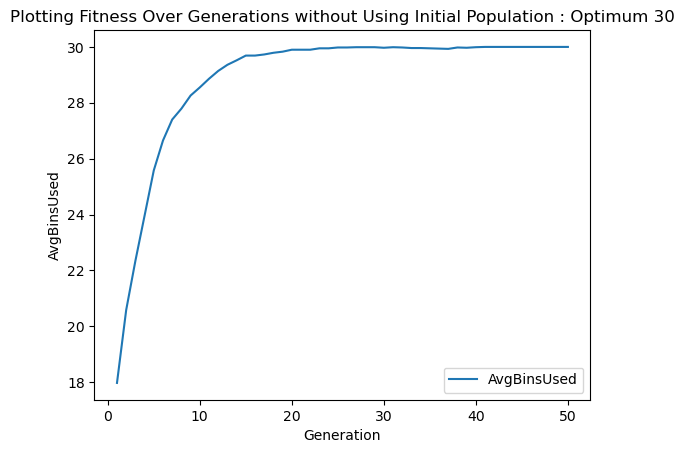

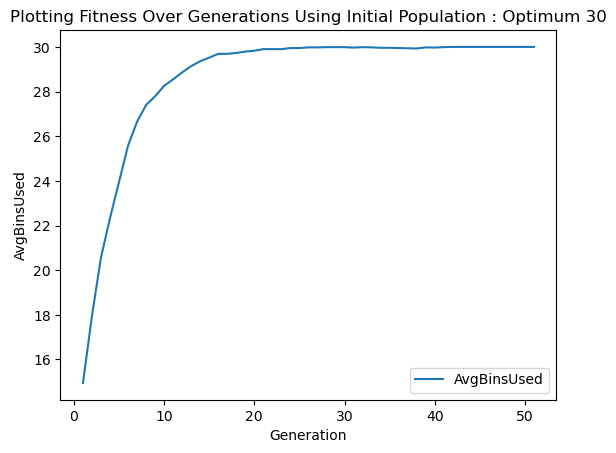

In [131]:
#plotting fitness for part 1
def plottingFitness(avgFitnessList, title):
    numberOfEvolutions = len(avgFitnessList)
    generations = list(range(1, numberOfEvolutions + 1))
    plt.plot(generations, avgFitnessList, label='AvgBinsUsed')
    plt.xlabel("Generation")
    plt.ylabel("AvgBinsUsed")
    plt.title(title)
    plt.legend()
    plt.show()
    
plottingFitness(fListOverGens, "Plotting Fitness Over Generations without Using Initial Population : Optimum 30")
#fListOverGens.append(avgFitnessOfPop(initialpopulation))
plottingFitness(infList, "Plotting Fitness Over Generations Using Initial Population : Optimum 30")


not found in generation -  1
12.925
not found in generation -  2
11.25625
not found in generation -  3
10.8
not found in generation -  4
10.913333333333334
not found in generation -  5
11.315
not found in generation -  6
11.561538461538461
not found in generation -  7
12.018181818181818
not found in generation -  8
12.269512195121951
not found in generation -  9
12.568
not found in generation -  10
12.745833333333334
not found in generation -  11
12.933098591549296
not found in generation -  12
13.221084337349398
not found in generation -  13
13.272395833333333
not found in generation -  14
13.468181818181819
not found in generation -  15
13.5276
not found in generation -  16
13.791843971631206
not found in generation -  17
13.868354430379746
not found in generation -  18
13.982954545454545
not found in generation -  19
14.038461538461538
not found in generation -  20
14.119534883720931
not found in generation -  21
14.129237288135593
not found in generation -  22
14.206782945736434
no

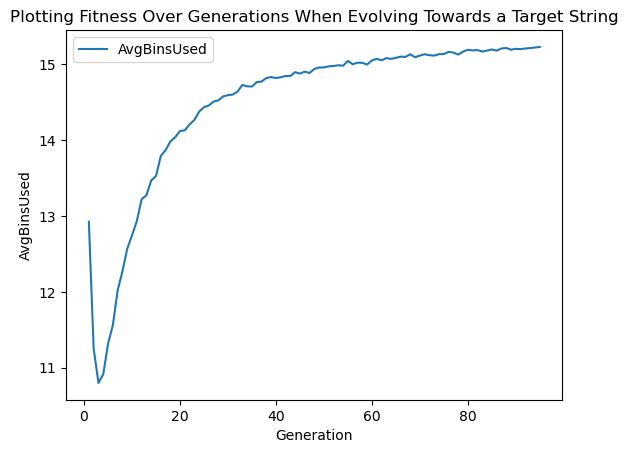

16


In [151]:
##part 2 - evolving to a target string
populationSize = 100
initialPopulation = createInitialPopulation(populationSize)
targetString = "110101001011001011101010010110"
individualFitness = []
fitnessOverGens = []
maxGenerations = 100
listOfStringsAndSimScore = []
crossoverRate = 0.2
bestIndividuals = []

def fitnessScore(string):
        fitnessRes = string.count('1')
        return fitnessRes

def evolvingMutation(string, mutationRate):##modify mutation function to work more efficiently when working towards the target string as it preserves bits that are already 1 and mutatues the 0s
    mutatedString = ''.join(
    bit if bit == '1' or random.random() > mutationRate else '0' if bit == '1' else '1'
    for bit in string
    )
    return mutatedString

def similarityToTargetScore(individual, targetString):#give each string a similarity score based on how similar it is to target
    return sum(1 for i,j in zip(individual, targetString)if i == j)

def targetedGeneticEvolution(targetString,pop,mutationRate, maxGenerations, crossoverRate):
       for g in range(maxGenerations):
            if any(individual == targetString for individual in pop):
                matchingString = next(individual for individual in pop if individual == targetString)
                print("Target String Found in generation - ", g+1)
                print(f"String {matchingString} found matching targetString {targetString}")
                return matchingString
            
            
            
            evolvedPopulation = []
            bestindividuals = []
            fitnessAvgPerGen = 0
            
            fitnessScores = [similarityToTargetScore(individual, targetString) for individual in pop]
            listOfStringsAndSimScore = list(zip(fitnessScores,pop))
            
            listOfStringsAndSimScore.sort(reverse = True, key=lambda x: x[0])
            
            #create a list of the 20 most similar strings to the target string
            #these will be used to populate new population
            for i in range(20):
                bestIndividuals.append(listOfStringsAndSimScore[i][1])
            
            for i in range(len(pop)//2):
                #implement crossover threshold in order to stop string evolving too quickly to gather enough avgFitnessData and allow for exploration
                if random.random() < crossoverRate:
                    parentOne = random.choice(bestIndividuals)
                    parentTwo = random.choice(bestIndividuals)
                    childOne, childTwo = onePointCrossover(parentOne, parentTwo)
                    childOne = evolvingMutation(childOne, mutationRate)
                    childTwo = evolvingMutation(childTwo, mutationRate)
                    evolvedPopulation.extend([childOne, childTwo])
                    #print(childOne)
                    fitnessAvgPerGen += childOne.count('1')
                    fitnessAvgPerGen += childTwo.count('1')
                else:
                    evolvedPopulation.extend([bestIndividuals[0], bestIndividuals[1]])
                    fitnessAvgPerGen += bestIndividuals[0].count('1')
                    fitnessAvgPerGen += bestIndividuals[1].count('1')
                
                #mutationRate = mutationRate + .01
            pop = evolvedPopulation
            #print(fitnessScore(bestIndividuals[0]))
            pop.extend(bestIndividuals)
            fitnessOfGen = fitnessAvgPerGen/len(pop)
            fitnessOverGens.append(fitnessOfGen)
            print("not found in generation - ", g + 1)
            print(fitnessOfGen)
    
evolvedPop = targetedGeneticEvolution(targetString, initialPopulation, 0.2, maxGenerations, crossoverRate)

plottingFitness(fitnessOverGens, "Plotting Fitness Over Generations When Evolving Towards a Target String")
print(fitnessScore(targetString))
    

[14.92, 17.56, 19.92, 22.01, 23.33, 24.96, 25.72, 26.62, 27.53, 28.23, 28.55, 28.79, 29.15, 29.36, 29.54, 29.59, 29.71, 29.81, 29.87, 29.93, 29.97, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]


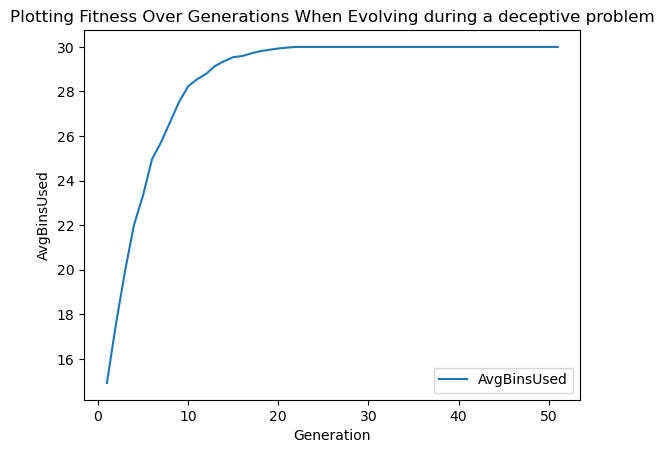

In [146]:
#deceptive landsacpe problem
#geneticEvolution()

deceptiveFitnessListOverGens = []
decepFitness = []


def deceptiveFitnessProblem(population):
    #measureFitness = string.count('1')
    maxFitness = all(string.count('1') == 0 for string in population) 
       
    if maxFitness:
        print("Optimum Fitness Found")
        return 2 * len(string)
    else:
        return sum(string.count('1') for string in population)
    
def deceptiveAvgFitnessOfPop(population):
    totalPopulationFitness = sum(deceptiveFitnessProblem(individual) for individual in population)/len(population)
    return totalPopulationFitness

def deceptiveGeneticEvolution(population, mutationRate):
    evolvedPopulation = []
    avgF = 0
    ##implementing onePointCrossover for population
    for id in range(len(population)//2):
        parentOne = random.choice(population)
      #print(parentOne.count('1'))
        parentTwo = random.choice(population)
        #print(parentTwo.count('1'))
        childOne, childTwo = onePointCrossover(parentOne, parentTwo)
        childOne = mutate(childOne, mutationRate)
        childTwo = mutate(childTwo, mutationRate)
        evolvedPopulation.extend([childOne, childTwo])
        #deceptiveFitnessListOverGens.append(deceptiveFitnessProblem(childOne))
        #deceptiveFitnessListOverGens.append(deceptiveFitnessProblem(childTwo))
        
    #decepFitness.append(deceptiveAvgFitnessOfPop(deceptiveFitnessListOverGens))
    deceptiveFitnessCheck = deceptiveFitnessProblem(evolvedPopulation)
    averagePopulationsFitness = deceptiveAvgFitnessOfPop(evolvedPopulation)
    deceptiveFitnessListOverGens.append(averagePopulationsFitness)
    return evolvedPopulation


initialPopulation = createInitialPopulation(populationSize)


#def geneticEvolution(population, mutationRate):
 #   evolvedPopulation = []
  #  avgF = 0
   # ##implementing onePointCrossover for population
    #for id in range(len(initialPop)//2):
     #   parentOne = random.choice(population)
      #  #print(parentOne.count('1'))
       # parentTwo = random.choice(population)
        #print(parentTwo.count('1'))
       # childOne, childTwo = onePointCrossover(parentOne, parentTwo)
       # childOne = mutate(childOne, mutationRate)
       # childTwo = mutate(childTwo, mutationRate)
       # evolvedPopulation.extend([childOne, childTwo])
        
    #currPopFitness = avgFitnessOfPop(evolvedPopulation)
    #fListOverGens.append(currPopFitness)
    #return evolvedPopulation

population = initialPopulation

initAveragePopulationsFitness = 0

initdeceptiveFitnessCheck = deceptiveFitnessProblem(population)
initAveragePopulationsFitness = deceptiveAvgFitnessOfPop(population)
deceptiveFitnessListOverGens.append(initAveragePopulationsFitness)

for i in range(50):
    population = deceptiveGeneticEvolution(population, 0.8)
    #fitnessofpop = avgFitnessOfPop(pop)
    #avgFitnessList.append(fitnessofpop)

#deceptiveGeneticEvolution(initialPopulation, 0.5)
print(deceptiveFitnessListOverGens)
plottingFitness(deceptiveFitnessListOverGens, "Plotting Fitness Over Generations When Evolving during a deceptive problem")






In [134]:
def loadingBinningProblemData(filePath):
    with open(filePath, 'r') as file:
        content = file.read()

    problemInstances = content.split("'BPP")

    dataList = []
    for index, problemInstance in enumerate(problemInstances[1:]):  # Skip the first empty element
        lines = problemInstance.strip().split('\n')

        #print(f"Processing problem instance {index + 1}")
        #print("Lines:", lines)

        if len(lines) < 3 or not lines[1].strip().isdigit():
            print(f"Error in problem instance {index + 1}: Insufficient or invalid lines")
            continue  # Skip this problem instance

        itemCount = int(lines[1].strip())
        binCapacity = int(lines[2].strip())

        itemWeights = []
        for line in lines[3:]:
            if line.strip():  # Check if the line is not empty
                weight, quantity = map(int, line.split())
                itemWeights.extend([weight] * quantity)

        dataList.append((itemCount, binCapacity, itemWeights))

    return dataList

filePath = "D:\Downloads\Binpacking-2.txt" 
readFile = loadingBinningProblemData(filePath)

if readFile:
    # Print data for the first problem instance
    numItemsOne, binCapacityOne, weightsOne = readFile[0]
    print("Number of Items:", numItemsOne)
    print("Bin Capacity:", binCapacityOne)
    print("Item Weights:", weightsOne)
else:
    print("No valid data loaded.")


Number of Items: 46
Bin Capacity: 1000
Item Weights: [200, 200, 200, 199, 198, 198, 197, 197, 194, 194, 193, 192, 191, 191, 191, 190, 190, 189, 188, 188, 187, 187, 186, 185, 185, 185, 185, 184, 184, 184, 183, 183, 183, 182, 182, 182, 181, 181, 180, 179, 179, 179, 179, 178, 177, 177, 177, 177, 175, 174, 173, 173, 172, 171, 171, 171, 170, 170, 169, 169, 169, 167, 167, 165, 165, 164, 163, 163, 163, 163, 162, 161, 160, 160, 159, 158, 158, 158, 157, 156, 156, 156, 156, 156, 156, 155, 155, 155, 154, 154, 153, 152, 152, 152, 151, 151, 150, 150, 150, 150]


Next Instance
Best Solution uses -  30
Best Solution uses -  24
Best Solution uses -  23
Best Solution uses -  21
Best Solution uses -  18
Best Solution uses -  18
Best Solution uses -  17
Best Solution uses -  17
Best Solution uses -  15
Best Solution uses -  14
Next Instance
Best Solution uses -  30
Best Solution uses -  25
Best Solution uses -  23
Best Solution uses -  20
Best Solution uses -  18
Best Solution uses -  15
Best Solution uses -  15
Best Solution uses -  16
Best Solution uses -  16
Best Solution uses -  16
Next Instance
Best Solution uses -  30
Best Solution uses -  23
Best Solution uses -  21
Best Solution uses -  22
Best Solution uses -  20
Best Solution uses -  17
Best Solution uses -  17
Best Solution uses -  12
Best Solution uses -  16
Best Solution uses -  14
Next Instance
Best Solution uses -  30
Best Solution uses -  26
Best Solution uses -  22
Best Solution uses -  20
Best Solution uses -  19
Best Solution uses -  19
Best Solution uses -  18
Best Solution uses 

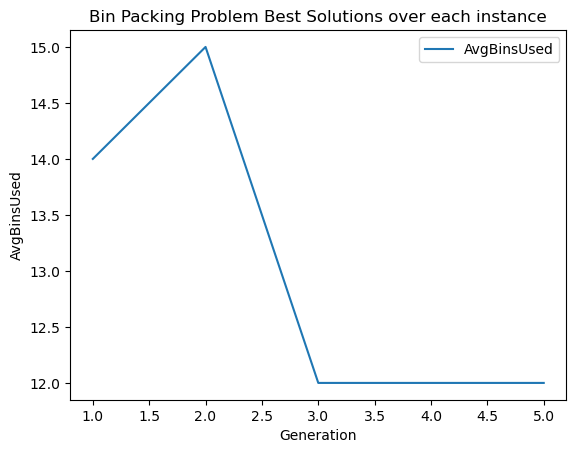

In [150]:

avgBinsUsedList = []
bestFitnessList = []
bestFitnessInEachGeneration = []
mutationRate = .05

def creatingPopulation(populationSize, numItems, maxBins):
    population = []
    for _ in range(populationSize):
        memberOfPop = [random.randint(0,maxBins-1)for _ in range(
        )]
        population.append(memberOfPop)
        
    return population


def mutateBinningProblem(singleFitnessString, mutationRate, maxBins):
    mutatedString = list(singleFitnessString)
    for i in range(len(mutatedString)):
        if random.random() < mutationRate:
            mutatedString[i] = str(random.randint(0, maxBins-1))
    return mutatedString

def onePointCrossoverBinningProblem(parentStringOne, parentStringTwo):
    crossoverPoint = random.randint(1, len(parentStringOne) - 1)
    childStringOne = parentStringOne[:crossoverPoint] + parentStringTwo[crossoverPoint:]
    childStringTwo = parentStringTwo[:crossoverPoint] + parentStringOne[crossoverPoint:]
    return childStringOne, childStringTwo

def getFitnessScores(memOfPop, weights, binCapacity):
    bins = {}
    for index, bit in enumerate(memOfPop):
        if bit == '1':
            if index not in bins:
                bins[index] = 0
            bins[index] += weights[index]
            
    validBins = sum(1 for totalWeight in bins.values() if totalWeight <= binCapacity)
    
    return validBins

def binPackingGeneticAlgorithm(population, maxGenerations, numItems, binCapacity, weights):
    
    numItems = numItems
    binCapacity = binCapacity
    weights = weights
    maxBins = numItems
    avgBinsUsedList = []
    creatingPopulation(100, numItems, maxBins)    
    bestFitnessList = []
    
    for generation in range(maxGenerations):
        newPopulation = []
        bestFitness = float('inf')
        bestSolution = None
        
        fitnessScores = [getFitnessScores(memberOfPopulation, weights, binCapacity) for memberOfPopulation in population]

        #avgBinsUsed = sum(len([bit for bit in solution if bit == '1'])for solution in population/len(population))
        #avgBinsUsedList.append(avgBinsUsed)
        
        for memberOfPopulation, fitness in zip(population, fitnessScores):
            if fitness < bestFitness:
                bestFitness = fitness
                bestSolution = memberOfPopulation
        
        selectedParents = []
        for id in range(len(population)//2):
            parentOne = random.choices(population, weights=fitnessScores, k=1)[0]
            parentTwo = random.choices(population, weights=fitnessScores, k=1)[0]
            childOne, childTwo = onePointCrossoverBinningProblem(parentOne, parentTwo)
            childOne = mutateBinningProblem(childOne, mutationRate, maxBins)
            childTwo = mutateBinningProblem(childTwo, mutationRate, maxBins)
            newPopulation.extend([childOne, childTwo])
            
        population = newPopulation
        
        print("Best Solution uses - ", bestFitness)
        bestFitnessList.append(bestFitness)
        
    bestFitnessInEachGeneration.append(min(bestFitnessList))
    
        
maxGens = 10    
for instance in dataList:
    print("Next Instance")
    numItems, binCapacity, weights = instance
    binPackingGeneticAlgorithm(population, maxGens, numItems, binCapacity, weights)

print(bestFitnessInEachGeneration)
plottingFitness(bestFitnessInEachGeneration, "Bin Packing Problem Best Solutions over each instance")